This code demonstrates the prediction of stock market price using Recurrent Neural Networks.<br>
Dataset: Infosys stock market price from 2000 to 2008 is used to train the RNN model.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow import keras
#import the Keras layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding,Dense, Dropout, LSTM, Dropout,Activation
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.utils import shuffle

In [4]:
# Loading data
data = pd.read_csv('files_input/infy/infy_2000 to 2008.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2496 entries, 0 to 2495
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Symbol                  2496 non-null   object 
 1   Series                  2496 non-null   object 
 2   Date                    2496 non-null   object 
 3   Prev Close              2496 non-null   float64
 4   Open Price              2496 non-null   float64
 5   High Price              2496 non-null   float64
 6   Low Price               2496 non-null   float64
 7   Last Price              2496 non-null   float64
 8   Close Price             2496 non-null   float64
 9   Average Price           2496 non-null   float64
 10  Total Traded Quantity   2496 non-null   int64  
 11  Turnover                2496 non-null   float64
 12  No. of Trades           2496 non-null   object 
 13  Deliverable Qty         2496 non-null   object 
 14  % Dly Qt to Traded Qty  2496 non-null   

In [5]:
data.head()

,Symbol,Series,Date,Prev Close,Open Price,High Price,Low Price,Last Price,Close Price,Average Price,Total Traded Quantity,Turnover,No. of Trades,Deliverable Qty,% Dly Qt to Traded Qty
0,INFOSYSTCH,EQ,03-Jan-2000,14467.75,15625.00,15625.20,15625.00,15625.20,15625.20,15625.18,5137,8.026657e+07,-,-,-
1,INFOSYSTCH,EQ,04-Jan-2000,15625.20,16800.00,16875.25,16253.00,16875.25,16855.90,16646.38,56186,9.352937e+08,-,-,-
2,INFOSYSTCH,EQ,05-Jan-2000,16855.90,15701.00,16250.00,15507.45,15507.45,15507.45,15786.38,164605,2.598516e+09,-,-,-
3,INFOSYSTCH,EQ,06-Jan-2000,15507.45,15256.65,15300.00,14266.85,14266.85,14266.85,14462.82,81997,1.185908e+09,-,-,-
4,INFOSYSTCH,EQ,07-Jan-2000,14266.85,13125.50,13125.50,13125.50,13125.50,13125.50,13125.50,7589,9.960942e+07,-,-,-


In [6]:
# Selecting only Date and Average Price columns
data = data[['Open Price', 'Average Price']]

In [7]:
# Scaling the values in the range of 0 to 1
scaler = MinMaxScaler(feature_range = (0, 1))
scaled_price = scaler.fit_transform(data.loc[:, 'Average Price'].values.reshape(-1, 1))

In [8]:
# Splitting dataset in the ratio of 75:25 for training and test
train_size = int(data.shape[0] * 0.75)
train, test = scaled_price[0:train_size, :], scaled_price[train_size:data.shape[0], :]
print("Number of entries (training set, test set): " + str((len(train), len(test))))

Number of entries (training set, test set): (1872, 624)


In [9]:
def create_dataset(scaled_price, window_size=1):
    data_X, data_Y = [], []
    for i in range(len(scaled_price) - window_size - 1):
        a = scaled_price[i:(i + window_size), 0]
        data_X.append(a)
        data_Y.append(scaled_price[i + window_size, 0])
    return(np.array(data_X), np.array(data_Y))

In [10]:
# Create test and training sets for one-step-ahead regression.
window_size = 3
train_X, train_Y = create_dataset(train, window_size)
test_X, test_Y = create_dataset(test, window_size)
print("Original training data shape:")
print(train_X.shape)

# Reshape the input data into appropriate form for Keras.
train_X = np.reshape(train_X, (train_X.shape[0], 1, train_X.shape[1]))
test_X = np.reshape(test_X, (test_X.shape[0], 1, test_X.shape[1]))
print("New training data shape:")
print(train_X.shape)

Original training data shape:
(1868, 3)
New training data shape:
(1868, 1, 3)


Keras simple RNN is layer is built as the first layer, then  2 dense layers is added.

In [11]:
import tensorflow as tf
model = tf.keras.Sequential([   
    tf.keras.layers.SimpleRNN(32),
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

2022-08-28 12:07:54.302639: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [15]:
#SimpleRNN model can also be created using Keras simpleRNN class
#Learners can uncomment  the below code to create the simpleRNN using Keras
#from tensorflow.keras.models import Model
#from tensorflow.keras.layers import SimpleRNN
#model = Sequential()
#model.add(SimpleRNN(units = 32, return_sequences=False, unroll=True, input_shape=(6, 2)))

In [13]:
# Compiling the model
model.compile(loss = "mean_squared_error", optimizer = "adam")

In [14]:
# Training the model
model.fit(train_X, train_Y, epochs=10, batch_size=1)

Epoch 1/10
1868/1868 [==============================] - 7s 3ms/step - loss: 0.0077
Epoch 2/10
1868/1868 [==============================] - 4s 2ms/step - loss: 6.4751e-04
Epoch 3/10
1868/1868 [==============================] - 4s 2ms/step - loss: 4.6002e-04
Epoch 4/10
1868/1868 [==============================] - 5s 2ms/step - loss: 4.2450e-04
Epoch 5/10
1868/1868 [==============================] - 5s 2ms/step - loss: 3.8224e-04
Epoch 6/10
1868/1868 [==============================] - 4s 2ms/step - loss: 3.8648e-04
Epoch 7/10
1868/1868 [==============================] - 4s 2ms/step - loss: 3.6662e-04
Epoch 8/10
1868/1868 [==============================] - 4s 2ms/step - loss: 3.8370e-04
Epoch 9/10
1868/1868 [==============================] - 4s 2ms/step - loss: 3.3650e-04
Epoch 10/10
1868/1868 [==============================] - 4s 2ms/step - loss: 3.4760e-04


In [16]:
def predict_and_score(model, X, Y):
    # Make predictions on the original scale of the data.
    predicted = scaler.inverse_transform(model.predict(X))
    # Prepare Y data to also be on the original scale for interpretability.
    orig_data = scaler.inverse_transform([Y])
    # Calculate RMSE.
    score = np.sqrt(mean_squared_error(orig_data[0], predicted[:, 0]))
    return(score, predicted)


In [17]:
rmse_train, train_predict = predict_and_score(model, train_X, train_Y)
rmse_test, test_predict = predict_and_score(model, test_X, test_Y)

print("Training data score: %.2f RMSE" % rmse_train)
print("Test data score: %.2f RMSE" % rmse_test)

20/20 [==============================] - 0s 2ms/step
Training data score: 273.58 RMSE
Test data score: 277.63 RMSE


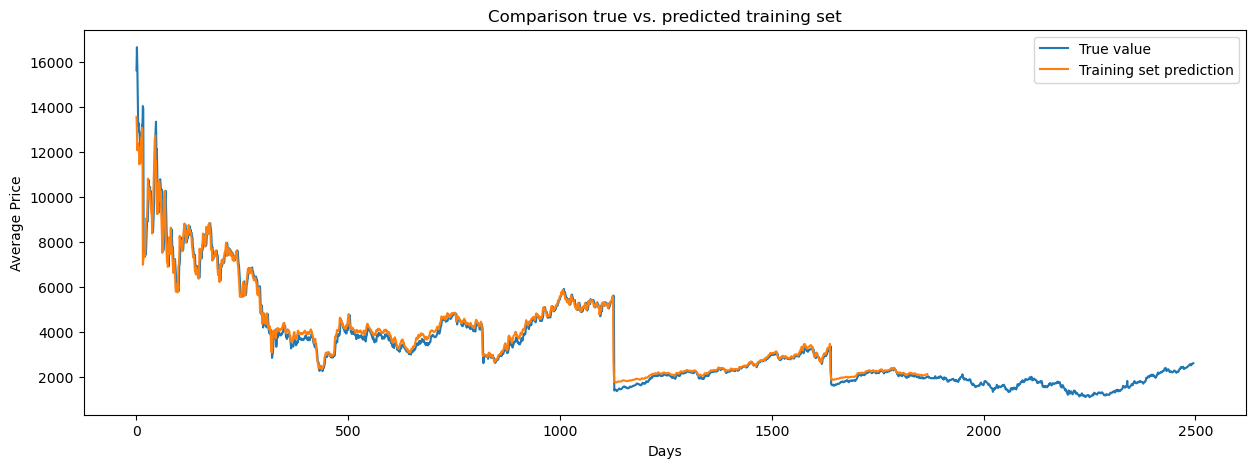

In [37]:
# Create the plot for predicted and the training data.
plt.figure(figsize = (15, 5))
plt.plot(scaler.inverse_transform(scaled_price), label = "True value")
plt.plot(train_predict, label = "Training set prediction")

plt.xlabel("Days")
plt.ylabel("Average Price")
plt.title("Comparison true vs. predicted training set")
plt.legend()
plt.show()

In [28]:
test_predict.shape

(620, 1)

In [33]:
test_orig = data[['Average Price']].iloc[train_size:data.shape[0], :]
test_orig.reset_index(inplace = True, drop=True)
print(test_orig.shape)

(624, 1)


In [34]:
test_orig.head()

,Average Price
0,1960.44
1,1956.51
2,1950.07
3,1938.21
4,1931.15


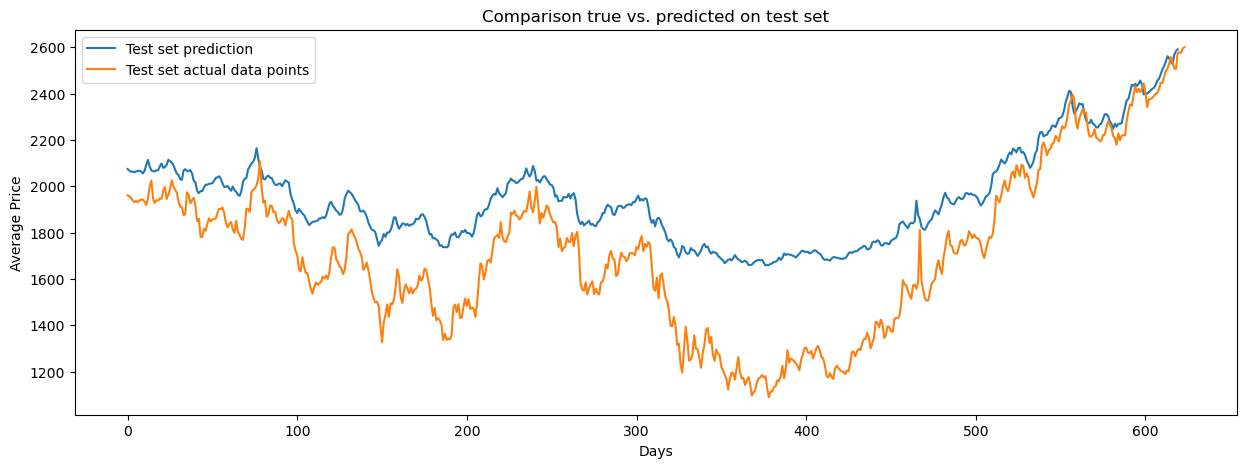

In [35]:
# Create the plot for predicted and the training data.
plt.figure(figsize = (15, 5))
plt.plot(test_predict, label = "Test set prediction")
plt.plot(test_orig, label = "Test set actual data points")

plt.xlabel("Days")
plt.ylabel("Average Price")
plt.title("Comparison true vs. predicted on test set")
plt.legend()
plt.show()